In [1]:
import pandas as pd
import numpy as np
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from statistics import mean

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})

from tqdm import tqdm
import gc

from constants import paths as p
from constants import tokens as t
from constants import hyperparameters as hp

In [2]:
hp.SOURCE_MAX_NUMBER_OF_TOKENS, hp.SOURCE_MAX_NUMBER_OF_SUBWORDS

(512, 506)

In [4]:
hp.TARGET_MAX_NUMBER_OF_TOKENS, hp.TARGET_MAX_NUMBER_OF_SUBWORDS

(256, 255)

In [5]:
dataset = pd.read_pickle(p.DATASET_PATH)
test_set = pd.read_pickle(p.TEST_SET_PATH)

In [6]:
dataset

,id,input,output
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin..."
1,tt0004972,"[{'title': 'One of the all time greats', 'rati...","{'title': 'Hateful, mean-spirited propaganda....."
2,tt0004972,"[{'title': 'One of the all time greats', 'rati...","{'title': 'Horrible film', 'rating': 1, 'body'..."
3,tt0004972,"[{'title': 'One of the all time greats', 'rati...",{'title': 'A major watermark for all that was ...
4,tt0004972,"[{'title': 'Skillfully Executed Hate Cinema', ...","{'title': 'A Great Classic', 'rating': 10, 'bo..."
...,...,...,...
143596,tt9908860,[{'title': 'You will be disappointed in the wi...,"{'title': 'Great!', 'rating': 9, 'body': 'Kind..."
143597,tt9908860,[{'title': 'Ashamed to be a glassblower if the...,"{'title': 'Truly annoying!', 'rating': 1, 'bod..."
143598,tt9908860,"[{'title': 'Truly annoying!', 'rating': 1, 'bo...",{'title': 'Ashamed to be a glassblower if thes...
143599,tt9908860,"[{'title': 'Truly annoying!', 'rating': 1, 'bo...","{'title': 'Blown away by Deborah's attitude', ..."


In [7]:
dataset.loc[0].output

{'title': 'One of the all time greats',
 'rating': 10,
 'body': 'Considering when The Birth Of A Nation was made and considering what came before, this is one of if not the greatest film ever made. It may not conform to the modern view of race relations. Never the less, it is an unforgitable viewing experience. A must see for any serious film historian.',
 'found_helpful': 13,
 'found_not_helpful': 17}

In [8]:
def helpfulness(x):
    return x["found_helpful"] / (x["found_helpful"] + x["found_not_helpful"])

In [9]:
column = "helpfulness_difference"
dataset[column] = dataset.output.apply(helpfulness) - dataset.input.apply(lambda l: mean([helpfulness(x) for x in l]))
test_set[column] = 1

In [10]:
column = "rating_difference"
dataset[column] = dataset.output.apply(lambda x: x["rating"]) - dataset.input.apply(lambda l: mean([x["rating"] for x in l]))
test_set[column] = 0

In [11]:
column = "length_difference"
dataset[column] = dataset.output.apply(lambda x: len(x['body'])) - dataset.input.apply(lambda l: mean([len(x["body"]) for x in l]))
test_set[column] = 0

In [12]:
dataset[:4]

,id,input,output,helpfulness_difference,rating_difference,length_difference
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin...",-0.038816,6.0,-440.666667
1,tt0004972,"[{'title': 'One of the all time greats', 'rati...","{'title': 'Hateful, mean-spirited propaganda.....",0.013036,-6.0,-43.333333
2,tt0004972,"[{'title': 'One of the all time greats', 'rati...","{'title': 'Horrible film', 'rating': 1, 'body'...",-0.059380,-6.0,59.333333
3,tt0004972,"[{'title': 'One of the all time greats', 'rati...",{'title': 'A major watermark for all that was ...,0.085160,6.0,424.666667


In [13]:
test_set[:4]

,id,input,output,helpfulness_difference,rating_difference,length_difference
0,tt0010307,[{'title': 'A super-important film to the hist...,"{'title': 'Almost as large in scope as '""Intol...",1,0,0
1,tt0011130,"[{'title': 'Genuinely frightening', 'rating': ...",{'title': 'John Barrymore-The Definitive Hyde'...,1,0,0
2,tt0011870,"[{'title': 'Incredible Silent Film', 'rating':...",{'title': 'Oscar Micheaux directed and wrote t...,1,0,0
3,tt0012938,[{'title': 'Seen at the New York Film Festival...,{'title': 'Swanson and Valentino Together Agai...,1,0,0


In [14]:
dataset.loc[0].output['body']

'Considering when The Birth Of A Nation was made and considering what came before, this is one of if not the greatest film ever made. It may not conform to the modern view of race relations. Never the less, it is an unforgitable viewing experience. A must see for any serious film historian.'

i can add rogue difference later 

In [15]:
np.random.seed(42)

In [15]:
dataset.input

0         [{'title': 'Hateful, mean-spirited propaganda....
1         [{'title': 'One of the all time greats', 'rati...
2         [{'title': 'One of the all time greats', 'rati...
3         [{'title': 'One of the all time greats', 'rati...
4         [{'title': 'Skillfully Executed Hate Cinema', ...
                                ...                        
143596    [{'title': 'You will be disappointed in the wi...
143597    [{'title': 'Ashamed to be a glassblower if the...
143598    [{'title': 'Truly annoying!', 'rating': 1, 'bo...
143599    [{'title': 'Truly annoying!', 'rating': 1, 'bo...
143600    [{'title': 'Truly annoying!', 'rating': 1, 'bo...
Name: input, Length: 143601, dtype: object

In [17]:
dataset.input = dataset.input.apply(np.random.permutation)

In [17]:
dataset.input

0         [{'title': 'Hateful, mean-spirited propaganda....
1         [{'title': 'Horrible film', 'rating': 1, 'body...
2         [{'title': 'One of the all time greats', 'rati...
3         [{'title': 'Hateful, mean-spirited propaganda....
4         [{'title': 'Skillfully Executed Hate Cinema', ...
                                ...                        
143596    [{'title': 'You will be disappointed in the wi...
143597    [{'title': 'Blown away by Deborah's attitude',...
143598    [{'title': 'Truly annoying!', 'rating': 1, 'bo...
143599    [{'title': 'This show was annoying.', 'rating'...
143600    [{'title': 'Truly annoying!', 'rating': 1, 'bo...
Name: input, Length: 143601, dtype: object

In [18]:
dataset["target_string"] = dataset.output.apply(lambda r : r['body'])

###  Search for best vocabulary size

In [16]:
len(dataset)

143601

In [17]:
train, validation = np.split(dataset.sample(frac=1, random_state=42), [int(0.85*len(dataset))])

In [18]:
len(train), len(validation)

(122060, 21541)

In [19]:
len(train) + len(validation) == len(dataset)

True

In [20]:
train_all_reviews_combined = "\n".join(train.target_string)
validation_all_reviews_combined = "\n".join(validation.target_string)

In [21]:
open(p.TRAIN_REVIEWS_TMP_RAW_TEXT_PATH, "w").write(train_all_reviews_combined)

68223920

In [22]:
tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace()

In [23]:
number_of_tokens_per_input = dataset.input.apply(lambda input: len(tokenizer.pre_tokenizer.pre_tokenize_str("\n".join([r['body'] for r in input]))))

In [25]:
hp.MAX_NUMBER_OF_TOKENS

512

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


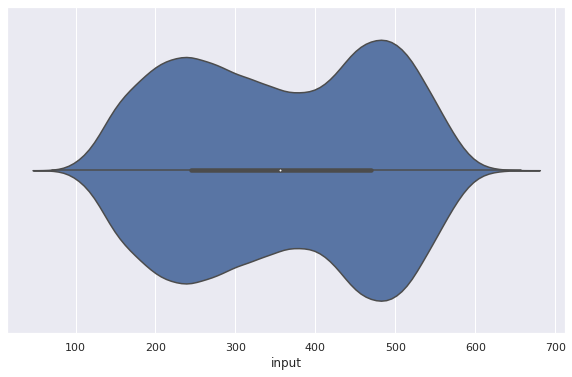

In [26]:
sns.violinplot(number_of_tokens_per_input)

In [27]:
number_of_unique_tokens_in_train = len(set([t[0] for t in tokenizer.pre_tokenizer.pre_tokenize_str(train_all_reviews_combined)]))

In [28]:
number_of_unique_tokens_in_train

123515

In [29]:
number_of_unique_tokens_in_validation = len(set([t[0] for t in tokenizer.pre_tokenizer.pre_tokenize_str(validation_all_reviews_combined)]))

In [30]:
number_of_unique_tokens_in_validation

54707

In [31]:
vocab_sizes = [1_000, 2_000, 3_000, 5_000, 10_000, 15_000, 20_000, 25_000, 30_000, 35_000, 40_000]

In [32]:
number_of_uknown_tokens = []

In [33]:
number_of_tokens = []

In [36]:
for vocab_size in tqdm(vocab_sizes):
    trainer = BpeTrainer(special_tokens=t.SPECIAL_TOKENS, vocab_size=vocab_size, min_frequency=0)
    tokenizer.train(trainer, [p.TRAIN_REVIEWS_TMP_RAW_TEXT_PATH])
    
    files = tokenizer.model.save("tokenizers", "tmp")
    tokenizer.model = BPE.from_file(*files, unk_token=t.UNKNOWN_TOKEN)
    
    validation_encoded = tokenizer.encode(validation_all_reviews_combined)
    number_of_uknown_tokens.append(len(validation_encoded.ids) - np.count_nonzero(validation_encoded.ids))
    number_of_tokens.append(len(validation_encoded.tokens))

100%|██████████| 11/11 [02:57<00:00, 16.10s/it]


In [37]:
number_of_uknown_tokens

[57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

In [38]:
real_number_of_tokens = len(tokenizer.pre_tokenizer.pre_tokenize_str(validation_all_reviews_combined))

size of vocabulary, ratio of vocab size and how much unique tokens are there in validation data,how much tokens he found in validation data, comparison between how much tokens he found vs the real number of tokens -> if every token was separated in it's own subword then this would be 1.00 which is not what we want as no lemmatizaiton and stuff like that will be done.

best one is 20k, this table below is read: ok so if i have availability to take on 73% of unique tokens then i cover 98% of tokens

In [39]:
[(vocab_size, vocab_size/number_of_unique_tokens_in_validation, token_number, real_number_of_tokens/token_number) for vocab_size,token_number in zip(vocab_sizes, number_of_tokens)]

[(1000, 0.01827919644652421, 4230844, 0.6040243979688213),
 (2000, 0.03655839289304842, 3484697, 0.7333587396551264),
 (3000, 0.05483758933957263, 3220010, 0.7936413240952668),
 (5000, 0.09139598223262105, 2985120, 0.8560905424237552),
 (10000, 0.1827919644652421, 2780062, 0.9192359738739639),
 (15000, 0.27418794669786317, 2702501, 0.94561778145503),
 (20000, 0.3655839289304842, 2662121, 0.9599612489439812),
 (25000, 0.45697991116310527, 2637858, 0.968790966003477),
 (30000, 0.5483758933957263, 2621819, 0.9747175529660895),
 (35000, 0.6397718756283474, 2610566, 0.9789191309470819),
 (40000, 0.7311678578609684, 2602374, 0.9820006655461513)]

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


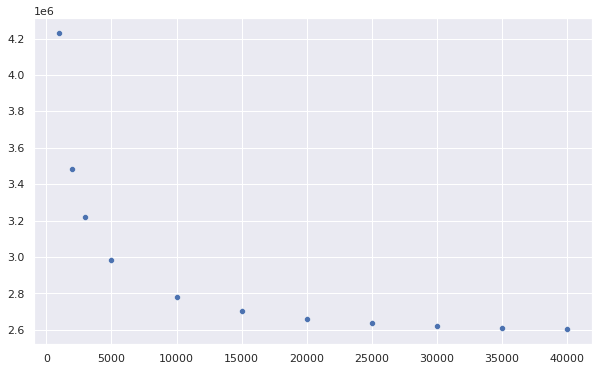

In [40]:
sns.scatterplot(vocab_sizes, number_of_tokens)

## Numericalization

In [19]:
open(p.DATASET_REVIEWS_TMP_RAW_TEXT_PATH, "w").write("\n".join(dataset.target_string))

80214389

In [20]:
tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace()

In [21]:
t.SPECIAL_TOKENS

['[UNK]', '[START]', '[END]', '[PAD]']

In [22]:
trainer = BpeTrainer(special_tokens=t.SPECIAL_TOKENS, vocab_size=hp.VOCABULARY_SIZE, min_frequency=0)

In [23]:
tokenizer.train(trainer, [p.DATASET_REVIEWS_TMP_RAW_TEXT_PATH])

In [24]:
files = tokenizer.model.save("tokenizers", "dataset")
tokenizer.model = BPE.from_file(*files, unk_token=t.UNKNOWN_TOKEN)

In [25]:
tokenizer.save(p.TOKENIZER_TRAINED_ON_DATASET_PATH)

In [26]:
tokenizer = Tokenizer.from_file(p.TOKENIZER_TRAINED_ON_DATASET_PATH)

In [27]:
[e.ids for e in tokenizer.encode_batch(["marin", "nino"])]

[[1422, 484], [83, 1939]]

In [28]:
dataset["source_string"] = dataset.input.apply(lambda input: t.START_TOKEN + " "+ f" {t.END_TOKEN} {t.START_TOKEN} ".join([r['body'] for r in input]) + " " + t.END_TOKEN)

In [29]:
dataset.target_string = t.START_TOKEN + " " + dataset.target_string + " " + t.END_TOKEN

In [30]:
dataset.source_string[0]

'[START] It\'s an absolute shame that Griffith allowed his politics to poison his art.  "Birth" is an overly long, melodramatic propaganda piece that is the "original" hatchet-job on Blacks. The effects of this film are still being felt today.  Instead of using his gift to further real progress in this country, he chose to create a film that distorts history,  while juxtaposing powerful images of Blacks as incompetent savages (or fawning servants) with courageous virtuous whites thereby pandering to xenophobic hate mongers and misguided members of his own race.  It gets 1 vote...the minimum. [END] [START] This is a horrible racist film that is a sad chapter in American movie history. If this film didn\'t exist some other film would have had been made over 100 minutes and had the kind of editing innovations this one had. The subject matter cancels out any admiration for the firsts in this movie. What is worst than this movie are some of the messages on this board defending the film. One

In [31]:
dataset.target_string[0]

'[START] Considering when The Birth Of A Nation was made and considering what came before, this is one of if not the greatest film ever made. It may not conform to the modern view of race relations. Never the less, it is an unforgitable viewing experience. A must see for any serious film historian. [END]'

In [32]:
dataset[:5]

,id,input,output,helpfulness_difference,rating_difference,length_difference,target_string,source_string
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin...",-0.038816,6.0,-440.666667,[START] Considering when The Birth Of A Nation...,[START] It's an absolute shame that Griffith a...
1,tt0004972,"[{'title': 'Horrible film', 'rating': 1, 'body...","{'title': 'Hateful, mean-spirited propaganda.....",0.013036,-6.0,-43.333333,[START] It's an absolute shame that Griffith a...,[START] This is a horrible racist film that is...
2,tt0004972,"[{'title': 'One of the all time greats', 'rati...","{'title': 'Horrible film', 'rating': 1, 'body'...",-0.059380,-6.0,59.333333,[START] This is a horrible racist film that is...,[START] Considering when The Birth Of A Nation...
3,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....",{'title': 'A major watermark for all that was ...,0.085160,6.0,424.666667,[START] Birth of a Nation is still controversi...,[START] It's an absolute shame that Griffith a...
4,tt0004972,"[{'title': 'Skillfully Executed Hate Cinema', ...","{'title': 'A Great Classic', 'rating': 10, 'bo...",-0.006785,6.0,-455.666667,[START] Despite the criticism that this film h...,[START] This racist film doesn't warrant in-de...


This is ridicilously bad written method for which i don't know how to unallocate taken ram memory and it takes like 8 GB of ram because the memory is prob allocated in rust....

dataset["input_numericalized"] = [e.ids for e in tokenizer.encode_batch(dataset.input_combined.values)]  
dataset["target_numericalized"] = [e.ids for e in tokenizer.encode_batch(dataset.target_string.values)]  
gc.collect()

What if i take .tokens too, i would kinda like to see the tokens too, i am not a fan of .decode method not printing special tokens..., it should have a flag to add to decoding method..., i could add wrappers to this library but everything is written in rust...

ova celija bi se dala puno bolje napisat, trebo sam numericalized dodat u dict i kasnije raditi podijelu na source i target jer ovako isti tekst enkodiram 4 puta

In [33]:
dataset["source_numericalized"] = [tokenizer.encode(e).ids for e in dataset.source_string]
dataset["target_numericalized"] = [tokenizer.encode(e).ids for e in dataset.target_string]
gc.collect()

0

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


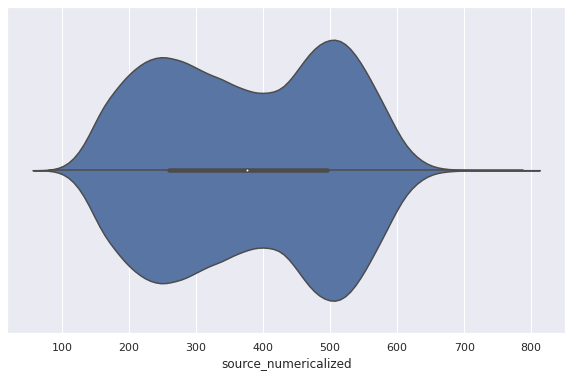

In [34]:
sns.violinplot(dataset.source_numericalized.apply(len))

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


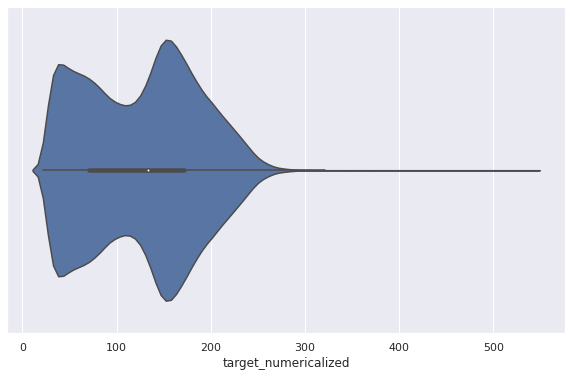

In [35]:
sns.violinplot(dataset.target_numericalized.apply(len))

In [36]:
len(dataset)

143601

In [37]:
dataset = dataset[dataset.source_numericalized.apply(len) <= hp.SOURCE_MAX_NUMBER_OF_TOKENS]

In [38]:
len(dataset)

114944

tu treba ic +1

In [39]:
dataset = dataset[dataset.target_numericalized.apply(len) <= hp.TARGET_MAX_NUMBER_OF_TOKENS]

In [40]:
len(dataset)

114445

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


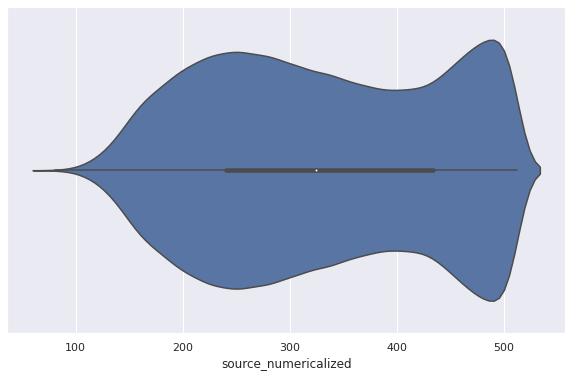

In [42]:
sns.violinplot(dataset.source_numericalized.apply(len))

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


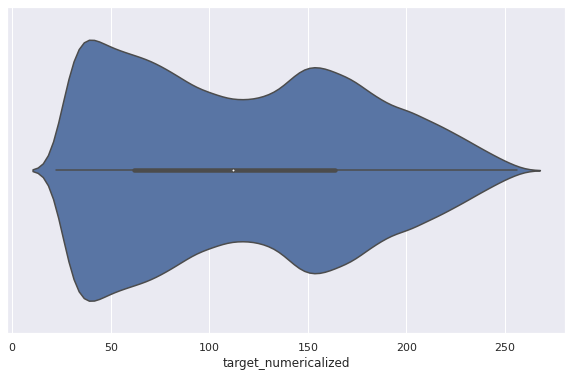

In [43]:
sns.violinplot(dataset.target_numericalized.apply(len))

In [44]:
dataset["source_numericalized_padded"] = dataset.source_numericalized + (hp.SOURCE_MAX_NUMBER_OF_TOKENS - dataset.source_numericalized.apply(len)).apply(lambda p: p*[tokenizer.token_to_id(t.PADDING_TOKEN)])

In [55]:
dataset["target_numericalized_input"] = dataset.target_numericalized.apply(lambda x: x[:-1])
dataset["target_numericalized_output"] = dataset.target_numericalized.apply(lambda x: x[1:])

In [95]:
dataset["target_numericalized_input_padded"] = dataset.target_numericalized_input + (hp.TARGET_MAX_NUMBER_OF_TOKENS - dataset.target_numericalized_input.apply(len)).apply(lambda p: p*[tokenizer.token_to_id(t.PADDING_TOKEN)])
dataset["target_numericalized_output_padded"] = dataset.target_numericalized_output + (hp.TARGET_MAX_NUMBER_OF_TOKENS - dataset.target_numericalized_output.apply(len)).apply(lambda p: p*[tokenizer.token_to_id(t.PADDING_TOKEN)])

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


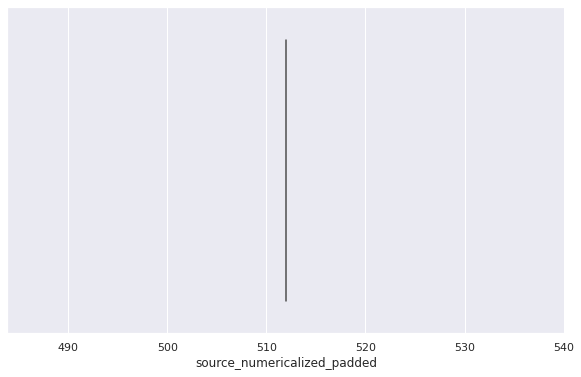

In [67]:
sns.violinplot(dataset.source_numericalized_padded.apply(len))

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


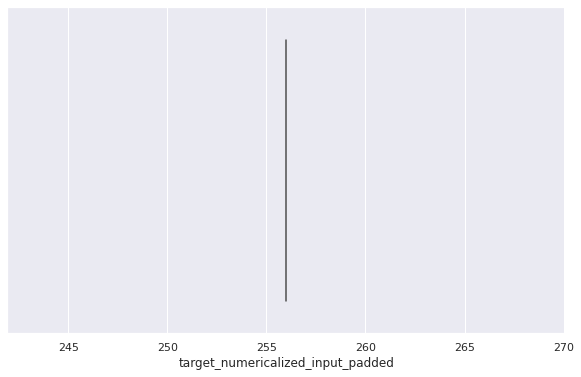

In [96]:
sns.violinplot(dataset.target_numericalized_input_padded.apply(len))

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


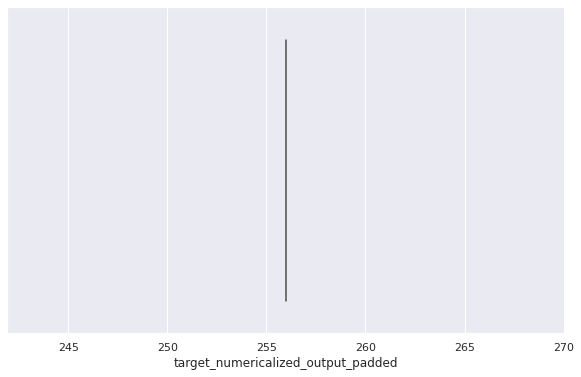

In [97]:
sns.violinplot(dataset.target_numericalized_output_padded.apply(len))

In [76]:
tokenizer.decode(dataset.source_numericalized_padded[0])

'It \' s an absolute shame that Griffith allowed his politics to poison his art . " Birth " is an overly long , melodramatic propaganda piece that is the " original " h atchet - job on Black s . The effects of this film are still being felt today . Instead of using his gift to further real progress in this country , he chose to create a film that distort s history , while juxta posing powerful images of Black s as incompetent sav ages ( or fa w ning serv ants ) with courageous virt uous whites thereby pandering to xen op hobic hate mong ers and misguided members of his own race . It gets 1 vote ... the minimum . This is a horrible racist film that is a sad chapter in American movie history . If this film didn \' t exist some other film would have had been made over 100 minutes and had the kind of editing innov ations this one had . The subject matter canc els out any admiration for the first s in this movie . What is worst than this movie are some of the messages on this board defendin

In [77]:
tokenizer.decode(dataset.source_numericalized_padded[0])[1899:2000]

'Hitchcock , Lang , P ab st , Mur n au , and Eis en stein . That alone should suggest that Bo a N is a'

In [78]:
dataset[:2]

,id,input,output,helpfulness_difference,rating_difference,length_difference,target_string,source_string,source_numericalized,target_numericalized,source_numericalized_padded,target_numericalized_input,target_numericalized_output,target_numericalized_input_padded,target_numericalized_output_padded
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin...",-0.038816,6.0,-440.666667,[START] Considering when The Birth Of A Nation...,[START] It's an absolute shame that Griffith a...,"[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[8304, 796, 544, 19301, 2279, 38, 11923, 530, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[8304, 796, 544, 19301, 2279, 38, 11923, 530, ..."
1,tt0004972,"[{'title': 'Horrible film', 'rating': 1, 'body...","{'title': 'Hateful, mean-spirited propaganda.....",0.013036,-6.0,-43.333333,[START] It's an absolute shame that Griffith a...,[START] This is a horrible racist film that is...,"[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[591, 12, 88, 486, 1233, 2102, 529, 15077, 400...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[591, 12, 88, 486, 1233, 2102, 529, 15077, 400..."


In [98]:
dataset.source_numericalized_padded = dataset.source_numericalized_padded.apply(np.array)
dataset.target_numericalized_input_padded = dataset.target_numericalized_input_padded.apply(np.array)

In [80]:
dataset["source_start_token_indexes"] = dataset.source_numericalized_padded.apply(lambda x: np.where(x == tokenizer.token_to_id(t.START_TOKEN))[0])

In [81]:
dataset["source_end_token_indexes"] = dataset.source_numericalized_padded.apply(lambda x: np.where(x == tokenizer.token_to_id(t.END_TOKEN))[0])

In [82]:
dataset["source_padding_token_first_index"] = dataset.source_numericalized_padded.apply(lambda v: np.where(v==tokenizer.token_to_id(t.PADDING_TOKEN))[0][0] if tokenizer.token_to_id(t.PADDING_TOKEN) in v else hp.SOURCE_MAX_NUMBER_OF_TOKENS) 

In [99]:
dataset["target_input_padding_token_first_index"] = dataset.target_numericalized_input_padded.apply(lambda v: np.where(v==tokenizer.token_to_id(t.PADDING_TOKEN))[0][0] if tokenizer.token_to_id(t.PADDING_TOKEN) in v else hp.TARGET_MAX_NUMBER_OF_TOKENS) 

In [102]:
dataset[:2]

,id,input,output,helpfulness_difference,rating_difference,length_difference,target_string,source_string,source_numericalized,target_numericalized,source_numericalized_padded,target_numericalized_input,target_numericalized_output,target_numericalized_input_padded,target_numericalized_output_padded,source_start_token_indexes,source_end_token_indexes,source_padding_token_first_index,target_input_padding_token_first_index
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin...",-0.038816,6.0,-440.666667,[START] Considering when The Birth Of A Nation...,[START] It's an absolute shame that Griffith a...,"[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[8304, 796, 544, 19301, 2279, 38, 11923, 530, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[8304, 796, 544, 19301, 2279, 38, 11923, 530, ...","[0, 128, 275]","[127, 274, 478]",479,65
1,tt0004972,"[{'title': 'Horrible film', 'rating': 1, 'body...","{'title': 'Hateful, mean-spirited propaganda.....",0.013036,-6.0,-43.333333,[START] It's an absolute shame that Griffith a...,[START] This is a horrible racist film that is...,"[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[591, 12, 88, 486, 1233, 2102, 529, 15077, 400...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[591, 12, 88, 486, 1233, 2102, 529, 15077, 400...","[0, 147, 351]","[146, 350, 416]",417,127


In [69]:
dataset["target_input_start_index"] = dataset.target_numericalized.apply(lambda x: np.where(x == tokenizer.token_to_id(t.START_TOKEN))[0][0])

In [72]:
dataset["target_input_end_index"] = dataset.target_numericalized.apply(lambda x: np.where(x == tokenizer.token_to_id(t.END_TOKEN))[0][0])

In [104]:
def write_indices(indexes_of_start_tokens, indexes_of_end_tokens, values_to_fill=list(range(hp.NUMBER_OF_INPUT_REVIEWS)), dtype=int, include_start_end=True, length = hp.SOURCE_MAX_NUMBER_OF_TOKENS, pad_fill=-1):
    array = np.zeros(length, dtype=dtype)
    for start_index, end_index, value in zip(indexes_of_start_tokens, indexes_of_end_tokens, values_to_fill):
        array[start_index:end_index+1] = value
        
        if not include_start_end:
            array[start_index] = pad_fill
            array[end_index] = pad_fill
    array[(indexes_of_end_tokens[-1]+1):length] = pad_fill
    return array  

In [108]:
def write_indices_row(row, values_to_fill=list(range(hp.NUMBER_OF_INPUT_REVIEWS)), dtype=float, pad_fill=0, include_start_end=False):
    return write_indices(row.source_start_token_indexes, row.source_end_token_indexes, values_to_fill=values_to_fill, dtype=dtype, include_start_end=include_start_end, length=hp.SOURCE_MAX_NUMBER_OF_TOKENS, pad_fill=pad_fill)

In [106]:
write_indices([0, 6, 12], [5, 11, 15], length=20, include_start_end=False)

array([-1,  0,  0,  0,  0, -1, -1,  1,  1,  1,  1, -1, -1,  2,  2, -1, -1,
       -1, -1, -1])

In [107]:
dataset[:2]

,id,input,output,helpfulness_difference,rating_difference,length_difference,target_string,source_string,source_numericalized,target_numericalized,source_numericalized_padded,target_numericalized_input,target_numericalized_output,target_numericalized_input_padded,target_numericalized_output_padded,source_start_token_indexes,source_end_token_indexes,source_padding_token_first_index,target_input_padding_token_first_index
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin...",-0.038816,6.0,-440.666667,[START] Considering when The Birth Of A Nation...,[START] It's an absolute shame that Griffith a...,"[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[8304, 796, 544, 19301, 2279, 38, 11923, 530, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[8304, 796, 544, 19301, 2279, 38, 11923, 530, ...","[0, 128, 275]","[127, 274, 478]",479,65
1,tt0004972,"[{'title': 'Horrible film', 'rating': 1, 'body...","{'title': 'Hateful, mean-spirited propaganda.....",0.013036,-6.0,-43.333333,[START] It's an absolute shame that Griffith a...,[START] This is a horrible racist film that is...,"[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[591, 12, 88, 486, 1233, 2102, 529, 15077, 400...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[591, 12, 88, 486, 1233, 2102, 529, 15077, 400...","[0, 147, 351]","[146, 350, 416]",417,127


In [109]:
dataset["source_padded_indices"] = dataset.apply(lambda row: write_indices_row(row, pad_fill=-1, include_start_end=True), axis=1)

In [110]:
dataset.source_padded_indices[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [111]:
dataset["source_padding_mask"] = dataset.source_padding_token_first_index.apply(lambda i: np.concatenate((np.zeros(i, dtype=int), np.ones(hp.SOURCE_MAX_NUMBER_OF_TOKENS - i, dtype=int))))
dataset.source_padding_mask = dataset.source_padding_mask.apply(lambda x: x.astype(bool))

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


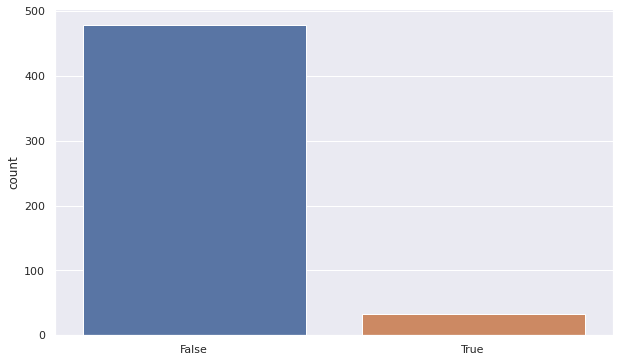

In [112]:
sns.countplot(dataset.source_padding_mask[0])

In [113]:
dataset["target_input_padding_mask"] = dataset.target_input_padding_token_first_index.apply(lambda i: np.concatenate((np.zeros(i, dtype=int), np.ones(hp.TARGET_MAX_NUMBER_OF_TOKENS - i, dtype=int))))
dataset.target_input_padding_mask = dataset.target_input_padding_mask.apply(lambda x: x.astype(bool))

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


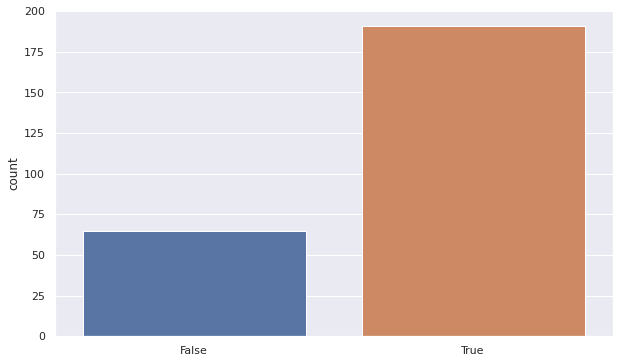

In [114]:
sns.countplot(dataset.target_input_padding_mask[0])

In [115]:
dataset[:2]

,id,input,output,helpfulness_difference,rating_difference,length_difference,target_string,source_string,source_numericalized,target_numericalized,...,target_numericalized_output,target_numericalized_input_padded,target_numericalized_output_padded,source_start_token_indexes,source_end_token_indexes,source_padding_token_first_index,target_input_padding_token_first_index,source_padded_indices,source_padding_mask,target_input_padding_mask
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin...",-0.038816,6.0,-440.666667,[START] Considering when The Birth Of A Nation...,[START] It's an absolute shame that Griffith a...,"[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...",...,"[8304, 796, 544, 19301, 2279, 38, 11923, 530, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...","[8304, 796, 544, 19301, 2279, 38, 11923, 530, ...","[0, 128, 275]","[127, 274, 478]",479,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."
1,tt0004972,"[{'title': 'Horrible film', 'rating': 1, 'body...","{'title': 'Hateful, mean-spirited propaganda.....",0.013036,-6.0,-43.333333,[START] It's an absolute shame that Griffith a...,[START] This is a horrible racist film that is...,"[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...",...,"[591, 12, 88, 486, 1233, 2102, 529, 15077, 400...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[591, 12, 88, 486, 1233, 2102, 529, 15077, 400...","[0, 147, 351]","[146, 350, 416]",417,127,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal..."


In [116]:
review=2

In [117]:
dataset.input[0][review]['body']

"Birth of a Nation is still controversial today. Its themes strike a chord with our sensibilities because it deals with an ugly part of our national identity. The Birth of a Nation not only caused the revival of the Ku Klux Klan but set a high cinematic standard that had long reaching effects on world cinema. Indeed it was a year later when Griffith responded to critics who railed against him for the cinematic adaptation of the now all but forgotten novel turned play, The Clansman. But let's look past the negrophobia for a minute if only to look at the earliest works of Hitchcock, Lang, Pabst, Murnau, and Eisenstein. That alone should suggest that BoaN is a worthy film, but suggesting this would overlook the superlative performance of Lillian Gish, prodigal camerawork and storytelling skills of Griffith, and of course the small matter of this films undaunted importance and popularity in the first half of the twentieth century."

In [118]:
tokenizer.decode([n for i,n in zip(dataset.source_padded_indices[0], dataset.source_numericalized[0]) if i==review])

"Birth of a Nation is still controversial today . Its themes strike a chord with our sensibilities because it deals with an ugly part of our national identity . The Birth of a Nation not only caused the revival of the Ku K lux K lan but set a high cinematic standard that had long reaching effects on world cinema . Indeed it was a year later when Griffith respond ed to critics who ra iled against him for the cinematic adaptation of the now all but forgotten novel turned play , The Cl ans man . But let ' s look past the ne gr op hobia for a minute if only to look at the ear liest works of Hitchcock , Lang , P ab st , Mur n au , and Eis en stein . That alone should suggest that Bo a N is a worthy film , but suggesting this would overlook the superl ative performance of L illian G ish , pro dig al camerawork and storytelling skills of Griffith , and of course the small matter of this films und aunt ed importance and popularity in the first half of the twent ie th century ."

In [119]:
dataset.source_padded_indices[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [120]:
dataset.source_padding_mask[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [121]:
dataset.target_input_padding_mask[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [122]:
dataset.target_string[0]

'[START] Considering when The Birth Of A Nation was made and considering what came before, this is one of if not the greatest film ever made. It may not conform to the modern view of race relations. Never the less, it is an unforgitable viewing experience. A must see for any serious film historian. [END]'

In [123]:
tokenizer.decode([n for b,n in zip(dataset.target_input_padding_mask[0], dataset.target_numericalized_input[0]) if not b])

'Considering when The Birth Of A Nation was made and considering what came before , this is one of if not the greatest film ever made . It may not conform to the modern view of race relations . Never the less , it is an un for g it able viewing experience . A must see for any serious film histor ian .'

In [124]:
[n for b,n in zip(dataset.target_input_padding_mask[0], dataset.target_numericalized_input[0]) if not b][-1]

19

In [128]:
tokenizer.id_to_token(19)

'.'

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114445 entries, 0 to 143600
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      114445 non-null  object 
 1   input                                   114445 non-null  object 
 2   output                                  114445 non-null  object 
 3   helpfulness_difference                  114445 non-null  float64
 4   rating_difference                       114445 non-null  float64
 5   length_difference                       114445 non-null  float64
 6   target_string                           114445 non-null  object 
 7   source_string                           114445 non-null  object 
 8   source_numericalized                    114445 non-null  object 
 9   target_numericalized                    114445 non-null  object 
 10  source_numericalized_padded             1144

In [130]:
dataset = dataset.reset_index(drop=True)

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


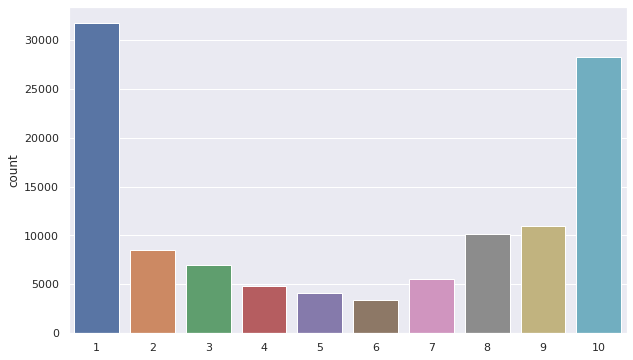

In [131]:
sns.countplot(dataset.output.apply(lambda r: [r['rating']]).sum())

/home/marin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


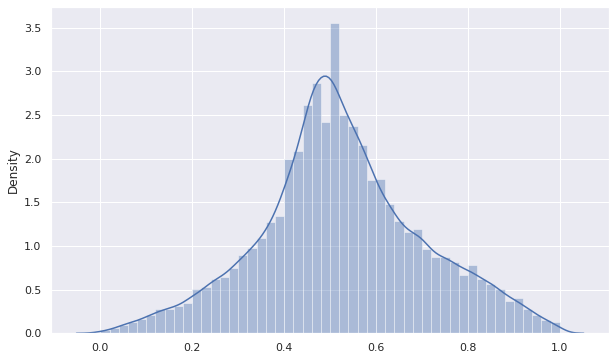

In [132]:
sns.distplot([helpfulness(o) for o in dataset.output])

In [133]:
dataset["source_ratings"] = dataset.apply(lambda row: write_indices_row(row, values_to_fill=[r['rating'] for r in row.input], dtype=int, include_start_end=False, pad_fill=0) ,axis=1)

In [134]:
dataset.source_ratings[8]

array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  0,  0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10

In [135]:
[(i,j) for i,j  in zip(dataset.source_ratings[8], dataset.source_padding_mask[8])]

[(0, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),
 (1, False),

In [136]:
dataset["source_helpfulnesses"] = dataset.apply(lambda row: write_indices_row(row, values_to_fill=[helpfulness(r) for r in row.input]) ,axis=1)

In [138]:
dataset.source_helpfulnesses[8]

array([0.        , 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067797,
       0.44067797, 0.44067797, 0.44067797, 0.44067797, 0.44067

In [139]:
dataset["helpfulness_difference_vector"] = dataset.apply(lambda row: write_indices_row(row, [row.helpfulness_difference] * 3), axis=1)
dataset["rating_difference_vector"] = dataset.apply(lambda row: write_indices_row(row, [row.rating_difference] * 3), axis=1)
dataset["length_difference_vector"] = dataset.apply(lambda row: write_indices_row(row, [row.length_difference] * 3), axis=1)

In [140]:
dataset.helpfulness_difference_vector[8]

array([0.        , 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005394,
       0.02005394, 0.02005394, 0.02005394, 0.02005394, 0.02005

In [141]:
dataset.rating_difference_vector[8]

array([ 0., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3

In [142]:
dataset.length_difference_vector[8]

array([  0.        , -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33333333,
       -63.33333333, -63.33333333, -63.33333333, -63.33

In [144]:
dataset.target_numericalized_input_padded[0]

array([    1,  8304,   796,   544, 19301,  2279,    38, 11923,   530,
         792,   498,  3415,   654,  1454,  1063,    17,   519,   488,
         548,   505,   633,   562,   487,  2743,   563,   724,   792,
          19,   591,   976,   562, 14374,   500,   487,  2024,   688,
         505,  3128,  9197,    19,  3165,   487,   840,    17,   497,
         488,   486,   547,   532,    76,   497,   682,  2583,  1706,
          19,    38,  1110,   607,   532,   605,  1381,   563,  2387,
        1235,    19,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,

In [145]:
dataset[:2]

,id,input,output,helpfulness_difference,rating_difference,length_difference,target_string,source_string,source_numericalized,target_numericalized,...,source_padding_token_first_index,target_input_padding_token_first_index,source_padded_indices,source_padding_mask,target_input_padding_mask,source_ratings,source_helpfulnesses,helpfulness_difference_vector,rating_difference_vector,length_difference_vector
0,tt0004972,"[{'title': 'Hateful, mean-spirited propaganda....","{'title': 'One of the all time greats', 'ratin...",-0.038816,6.0,-440.666667,[START] Considering when The Birth Of A Nation...,[START] It's an absolute shame that Griffith a...,"[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...","[1, 8304, 796, 544, 19301, 2279, 38, 11923, 53...",...,479,65,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.4722222222222222, 0.4722222222222222, ...","[0.0, -0.038816153152366806, -0.03881615315236...","[0.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[0.0, -440.66666666666663, -440.66666666666663..."
1,tt0004972,"[{'title': 'Horrible film', 'rating': 1, 'body...","{'title': 'Hateful, mean-spirited propaganda.....",0.013036,-6.0,-43.333333,[START] It's an absolute shame that Griffith a...,[START] This is a horrible racist film that is...,"[1, 620, 488, 70, 1602, 4386, 563, 529, 488, 7...","[1, 591, 12, 88, 486, 1233, 2102, 529, 15077, ...",...,417,127,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.417910447761194, 0.417910447761194, 0....","[0.0, 0.01303569869948501, 0.01303569869948501...","[0.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0...","[0.0, -43.33333333333337, -43.33333333333337, ..."


In [146]:
train, validation = np.split(dataset.sample(frac=1, random_state=42), [int(0.85*len(dataset))])

In [147]:
len(train), len(validation)

(97278, 17167)

In [148]:
dataset.to_pickle(p.DATASET_NUMERICALIZED_PATH)
train.to_pickle(p.TRAIN_NUMERICALIZED_PATH)
validation.to_pickle(p.VALIDATION_NUMERICALIZED_PATH)

In [149]:
tokenizer.save(p.TOKENIZER_TRAINED_ON_DATASET_PATH)

In [129]:
tokenizer.encode("Marin je kralj").ids

[1447, 484, 1379, 80, 2844, 79]

In [130]:
tokenizer.decode(tokenizer.encode("Marin je kralj").ids)

'Mar in je k ral j'

Mar ##in je k ##ral ##j -> Marin je kralj

In [42]:
validation_encoded = tokenizer.encode(validation_all_reviews_combined)

In [43]:
len(validation_encoded.ids) - np.count_nonzero(validation_encoded.ids)

57

Uknown tokens from validation data

In [46]:
[validation_all_reviews_combined[validation_encoded.offsets[i][0]:validation_encoded.offsets[i][1]] for i, id in enumerate(validation_encoded.ids) if id == tokenizer.token_to_id(t.UNKNOWN_TOKEN)]

['🤘',
 'ò',
 'ò',
 'ò',
 '🇦',
 '💘',
 'Б',
 'р',
 'т',
 'к',
 'а',
 'я',
 'к',
 'р',
 'п',
 'о',
 'т',
 'ь',
 'Û',
 'Ê',
 'Ê',
 'Ê',
 'Ê',
 '\x83',
 '🔟',
 '🔟',
 '💛',
 '💀',
 'Ú',
 '（',
 '）',
 '\x1b',
 '😮',
 '😰',
 '😰',
 '💋',
 '🗝',
 '͡',
 '͡',
 '͡',
 '͜',
 'ʖ',
 '͡',
 '\x8a',
 '🕷',
 '🕸',
 'Ñ',
 '☝',
 'ò',
 '\x83',
 'ű',
 'к',
 'л',
 'ю',
 'к',
 'в',
 'а']